# Phase 1 Project

## Introduction

Congratulations on completing phase 1! In this notebook, you will complete a final project that applies your python and visualization skills to real word business data. 

## Objectives 
In this project, you will...
- Read in data that has been stored as a `json` file.
- Describe how the data is structured.
- Use Python to filter a nested data structure
- Define python functions
- Calculate descriptive statistics
- Visualize data via matplotlib


# Task: Compare New York Pizza Restaurants with Above Average and Below Average Ratings
![Pizza gif](https://media.giphy.com/media/eK1eFdpj5kMWqZ9bLJ/giphy.gif?cid=ecf05e47rkbp48nwz3za6dloo8xfwzueu0rx2vklguo7xyhu&rid=giphy.gif&ct=g)

## Business Understanding 

A client at your analytics firm is considering opening a pizza restaurant in New York City. 

They have asked you to develop a business intelligence report to fact check the following claims:
1. Your client wants to ensure they have an above average Yelp rating. They have previously owned restuarants in other cities, where a `3` was the average. They would like to know if that holds true in New York City. 
1. Your client has noticed that restaurants on yelp with a high review count seem to be quite successful. They have decided to focus on maximizing their review count which they believe will allow them to have an above average overall review. 
1. After looking at a few restaurants on Yelp, your client believes that most above average restaurants have a price point of `$$`. They are considering increasing their prices from `$` to `$$` to match the majority of above average restaurants, and would like you to find the most common price point for above average restaurants in New York City.
1. In terms of location they have been told that above average restaurants are usually further east and below average are usually further west, but that the biggest difference is whether the restaurant is on the north or south side. They would like you to determine if the data supports this claim.
1. They believe that the `10012` zipcode in New York City is the best place to open a restaurant. They wish to open a restaurant in close proximity to other highly rated restaurants, and they believe `10012` has the most in NYC.



The primary purpose of this analysis is _descriptive_, meaning your analysis should report calculated statistics such as `counts` and `mean`, and should be focused on providing a simple, factual, understanding of the data. 


## Data Understanding

You have been provided a Yelp dataset containing information about restaurants in New York City. The data is named `pizza_businesses.json` and is stored in the current working directory. You will need to load in this dataset, inspect how the data is structured, and use the provided information to fact check your client's claims. 

## Load the data

A dataset containing information about New York pizza restaurants is stored in this notebook's repository with the name `pizza_businesses.json`.

In the cell below, load the json data into a python dictionary.

In [2]:
# Import the json python package
import json

# Load in the data
with open('pizza_businesses.json') as f:
    data = json.load(f)
#print(type(data))

## Describe the data

Now that you've loaded in the dataset, the structure of the data should be inspected.

In the cell below, evaluate 
- The datatype of the overall dataset
- The datatype of a single observation
- The number of observations, and then
- Isolate the first observation in the dataset

In [3]:
# Replace None with your code!

# Find the datatype for the overall dataset
dataset_type = type(data)
# Isolate the first observation
first_observation = data[0]
# Find the datatype for the first observation
observation_type = type(data[0])
# How many observations are there
num_observations = len(data)

Run this following cell unchanged to print out descriptive information for the dataset!

In [4]:
from pprint import pprint

print(f'The dataset is a \033[1m{dataset_type}\033[0m')
print(f'The observations are a \033[1m{observation_type}\033[0m',)
print(f'There are \033[1m{num_observations} observations.\033[0m')
print('\033[1m\nThe first observation:\033[0m')
print('==========================================')
pprint(first_observation)
print('==========================================')

The dataset is a <class 'list'>
The observations are a <class 'dict'>
There are 1000 observations.

The first observation:
{'latitude': 40.72308755605564,
 'location': {'address1': '27 Prince St',
              'address2': None,
              'address3': '',
              'city': 'New York',
              'country': 'US',
              'display_address': ['27 Prince St', 'New York, NY 10012'],
              'state': 'NY',
              'zip_code': '10012'},
 'longitude': -73.99453001177575,
 'name': 'Prince Street Pizza',
 'phone': '+12129664100',
 'price': '\\$',
 'rating': 4.5,
 'review_count': 3976,
 'transactions': ['delivery', 'pickup']}


## Find the possible rating options. 

In the cell below, create a variable called `rating_options` that has a [set datatype](https://realpython.com/python-sets/), and is a unique collection of the possible ratings a restaurant can recieve.

In [5]:
# Create the `rating_options` variable
rating_options = set()

# Loop over all of the observations in the dataset


    # Isolate the rating for the restaurant
for restaurant in data:
    
    # Add the rating to 
    # the `rating_options` variable
    rating_options.add(restaurant['rating'])
    
rating_options

{1.0, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0}

Run the next cell unchanged to test your work!
> If the below cell runs without throwing an error, your code is likely correct!

In [6]:
assert type(rating_options) == set
assert len(rating_options) == 8
assert list(rating_options)[0] != list(rating_options)[1]

## Plot the distribution for ratings

Now that you know what rating options are available, in the cell below plot a histogram showing the distribution of ratings. 

4.016


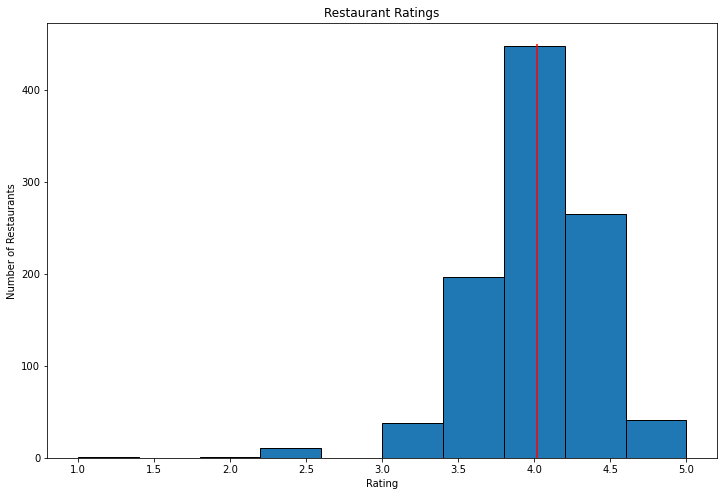

In [6]:
# Import matplotlib's pyplot module
import matplotlib.pyplot as plt
%matplotlib inline

# Create an empty list.
# We will store all ratings in this list
ratings = []

# Loop over every restaurant in the dataset
for restaurant in data:

    # Isolate the rating
    rating = restaurant['rating']
   
    # Append the rating to the `ratings` list
    ratings.append(rating)

#AVerage calculation for own interest.    
#print(sum(ratings)/len(ratings))
    
# Create a matplotlib subplot
fig, ax = plt.subplots(figsize=(12,8))


# Plot a histogram of the ratings list
ax.hist(ratings, edgecolor = 'black')
ax.vlines(x=sum(ratings)/len(ratings), ymin=0, ymax=450,colors ='r')
ax.set_title('Restaurant Ratings')
ax.set_ylabel('Number of Restaurants')
ax.set_xlabel('Rating');

**Interpret the ratings histogram. How does the visualization relate to your client's claims?**

Looking at the histogram above, less than 50 restaurants out of 1000 have a rating of 3 or less. As such New York City will have an average Yelp rating above 3.  I have included a red verticle line that displays the actual average, which is approx 4. 

## Isolate the restaurants with an above average rating

Now that you have an understanding for what is an average rating, next you will isolate restaurants with above average and below average ratings so you can compare them.

In the cell below, filter out all restaurants that do not have a rating of at least `4.5`.

In [8]:
# Create an empty list
# You will store restaurants in this list
above_average = []

# Loop over the dataset
for restaurant in data:

    # Isolate the rating
    rating = restaurant['rating']
    
    # Check if the rating is at least 4.5
    if rating >= 4.5:
        # If the rating is at least 4.5
        # Add the restaurant to the list
        above_average.append(restaurant)

Run the next cell unchanged to test your work!
> If the below cell runs without throwing an error, your code is likely correct!

In [10]:
assert type(above_average) == list
assert type(above_average[0]) == dict
assert len(above_average) == 306

## Isolate restaurants with a below average rating

Now repeat the process for below average ratings.

In the cell below, isolate restaurants that have a rating of no more than `3.5`.

In [11]:
# Create an empty list
# You will store restaurants in this list
below_average = []

# Loop over the restaurants in the dataset
for restaurant in data:

    # Isolate the rating
    rating = restaurant['rating']
    
    # Check if the rating is no more than 3.5
    if rating <= 3.5:
    
        # If the rating no more than 3.5
        # Add the restaurant to the list
        below_average.append(restaurant)

Run the next cell unchanged to test your work!
> If the below cell runs without throwing an error, your code is likely correct!

In [12]:
assert type(below_average) == list
assert type(below_average[0]) == dict
assert len(below_average) == 247

## Calculate average review counts for both groups

Now that you've isolated above average and below average restaurants, you can calculate the average number of reviews received by both groups.

To do this, you will need to isolate the review counts for both groups, and calculate their average. 

The code for isolating the review counts will look very similar to code you have previously written, which is a good sign that a function should be defined!

In the cell below, define a function called `isolate_values` that receives two arguments:
1. A list of dictionaries
2. A string indicating the key that should be isolated for each dictionary

This function should:
- Loop over every dictionary in the inputted list
- Pull out the value assigned to the inputted key
- Append the value to a new list
- Return the new list of values

In [13]:
def isolate_values(dictionaries, key):
    # Create an empty list
    # for storing data
    value_list = []
    
    # Loop over every dicionary 
    for dict in dictionaries:
        
        # Isolate the value of the dictionary with the `key`
        key_val = dict[key]
        
        # Append the value to the list
        value_list.append(key_val)
    
    # Return the list of values
    return value_list

Run the next cell unchanged to test your work!
> If the below cell runs without throwing an error, your code is likely correct!

In [14]:
from types import FunctionType

assert type(isolate_values) == FunctionType
assert type(isolate_values([{'test': 1}], 'test')) == list
assert len(isolate_values([{'test': 1}], 'test')) == 1
assert len(isolate_values(above_average, 'name')) == len(above_average)
assert isolate_values(above_average, 'name')[-1] == above_average[-1]['name']

Now use the `isolate_values` function to create a list called `abv_avg_rev_cnts` that contains the review counts for every above average restaurant.

In [15]:
# Replace None with your code
abv_avg_rev_cnts = isolate_values(above_average,'review_count')

Now use the `isolate_values` function to create a list called `blw_avg_rev_cnts` that contains the review counts for every below average restaurant.

In [16]:
# Replace None with your code
blw_avg_rev_cnts = isolate_values(below_average,'review_count')

Run the next cell unchanged to test your work!
> If the below cell runs without throwing an error, your code is likely correct!

In [17]:
assert type(abv_avg_rev_cnts) == list
assert type(abv_avg_rev_cnts[0]) == int
assert type(blw_avg_rev_cnts) == list
assert type(blw_avg_rev_cnts[0]) == int
assert len(abv_avg_rev_cnts) == len(above_average)
assert len(blw_avg_rev_cnts) == len(below_average)
assert abv_avg_rev_cnts[101] == above_average[101]['review_count']
assert blw_avg_rev_cnts[101] == below_average[101]['review_count']

Now that you've isolated the review counts for both groups, you can calculate the average review count!

But before you do that, you should inspect the distribution of review counts to make sure `mean` is an appropriate measure of centrality.

In the cell below, we plot a histogram for above average and below average restaurant review counts.

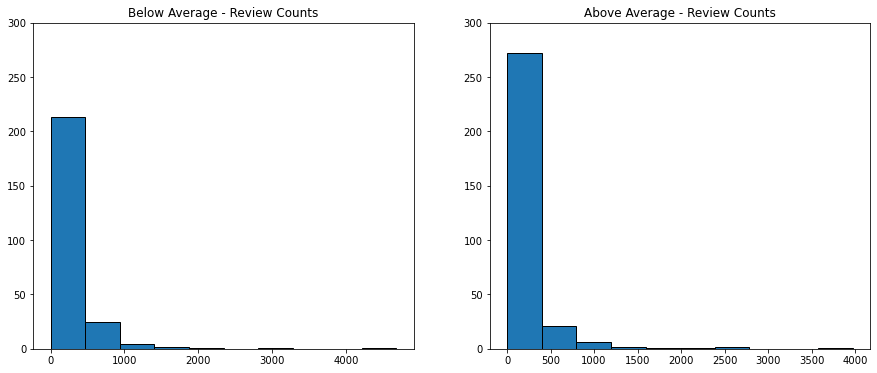

In [18]:
# Initialize a matplotlib subplot
# with 1 row and 2 columns
fig, ax = plt.subplots(1,2, figsize=(15,6))

# Plot a histogram of below average review counts
# on the first axis
ax[0].hist(blw_avg_rev_cnts, edgecolor = 'black')
ax[0].set_ylim(0,300)

# Set the title for the first axis
# to "Below Average - Review Counts"
ax[0].set_title('Below Average - Review Counts')

# Plot a histogram of above average review counts
# on the first axis
ax[1].hist(abv_avg_rev_cnts, edgecolor = 'black')
ax[1].set_ylim(0,300)

# Set the title for the first axis
# to "Above Average - Review Counts"
ax[1].set_title('Above Average - Review Counts');


**Interpret the above visualizations. What statistic is best suited for these data?**

In both below average restaurants and above average restaurants, the majority of restaurants have between 0 and 500 reviews, with the number of restaurants having above 1000 reviews being minimal for both groups. The range of review counts means that detail is lost within the 0-500 range where the bulk of restaurants fall. A more useful statistic will be the mean number of reviews for each group.

In the cell below, calculate the average review count for above average and below average restaurants.

In [19]:
# Import numpy
import numpy as np

# Replace None with your code
abv_avg_rev_cnt_center = round(sum(abv_avg_rev_cnts)/len(abv_avg_rev_cnts),2)
blw_avg_rev_cnt_center = round(sum(blw_avg_rev_cnts)/len(blw_avg_rev_cnts),2)

print('Above average review count:', abv_avg_rev_cnt_center)
print('Below average review count:', blw_avg_rev_cnt_center)

Above average review count: 189.39
Below average review count: 286.0


**Interpret the average review count for both groups. How does this relate to your client's claims?**

The belief that a larger number of reviews will lead to a higher than average review rating is not born out. Instead the average review count for below average restaurants is higher than that of the above average restaurants.

## Count the price option frequency

The `price` variable in the dataset is a string of dollar signs indicating how expensive a restaurant's price point is. 

In the cell below, write a for loop that counts how frequently a given price point appears for the `above_average` dataset

In [20]:
# Create an empty dictionary to store the
# counts for each price point
abv_avg_prices = {}

# Loop over the above average restaurants
for restaurant in above_average:

    # Isolate the price point for the restuarant
    pricepoint = restaurant['price']
    
    
    # Check if the price has been added to the dictionary
    if pricepoint in abv_avg_prices:
    
            # If the price is already a key in the dictionary
            # Add one to the count for that price point
            abv_avg_prices[pricepoint] = abv_avg_prices[pricepoint]+1
            continue
            
    # If the price has not been added to the dictionary
    # Else set the price as the key and the value as the integer `1`
    abv_avg_prices[pricepoint] = 1
#print(abv_avg_prices)

{'\\$': 74, '\\$\\$': 87, 'Unknown': 134, '\\$\\$\\$': 10, '\\$\\$\\$\\$': 1}


Run the next cell unchanged to test your work!
> If the below cell runs without throwing an error, your code is likely correct!

In [21]:
assert type(abv_avg_prices) == dict
assert len(abv_avg_prices) == 5
assert '\\$\\$\\$\\$' in abv_avg_prices

**Now reapply the same process, but instead calculate the price point frequencies for the `below_average` dataset.**

In [22]:
# Create an empty dictionary to store the
# counts for each price point
blw_avg_prices = {}

# Loop over the below average restaurants
for restaurant in below_average:

    # Isolate the price point for the restuarant
    pricepoint = restaurant['price']
    
    # Check if the price has been added to the dictionary
    if pricepoint in blw_avg_prices:
    
            # If the price is already a key in the dictionary
            # Add one to the count for that price point
            blw_avg_prices[pricepoint] = blw_avg_prices[pricepoint]+1
            continue
            
    # If the price has not been added to the dictionary
    # Set the price as the key and the value as the integer `1`
    blw_avg_prices[pricepoint] = 1


Run the next cell unchanged to test your work!
> If the below cell runs without throwing an error, your code is likely correct!

In [23]:
assert type(blw_avg_prices) == dict
assert len(blw_avg_prices) == 4
assert '\\$' in blw_avg_prices

## Create a bar plot that sets the frequency of each price point as the y axis

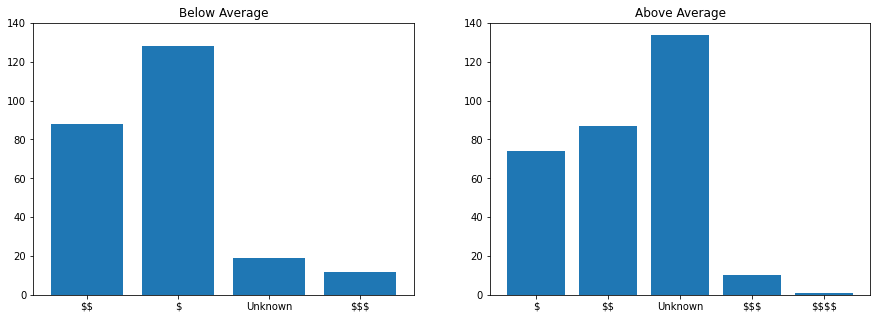

In [24]:
# Create a matplotlib subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(figsize=(15,5),ncols=2)

# Isolate keys of the below average price count dictionary blw_avg_prices
# This will be the x-axis
x1 = list(blw_avg_prices.keys())

# Isolate the values of the below average price count dictionary
# This will be the y-axis
y1 = list(blw_avg_prices.values())

# Plot the below average price point counts as a bar plot
# on the first axis
ax1.bar(x1, y1)
ax1.set_ylim(0,140)

# Set the title for the first axis
# to the string "Below Average"
ax1.set_title('Below Average')

# Isolate keys of the above average price count dictionary  abv_avg_prices
# This will be the x-axis
x2 = list(abv_avg_prices.keys())

# Isolate the values of the above average price count dictionary
# This will be the y-axis
y2 = list(abv_avg_prices.values())

# Plot the above average price counts as a bar plot
# on the second axis
ax2.bar(x2, y2)
ax2.set_ylim(0,140)

# Set the title for the second axis to 
# the string 'Above Average'
ax2.set_title('Above Average');

**Interpret the above visualization. How does it relate to your client's claims?**

The most common price point for above average restaurants in the data above is `Unknown`. The second highest is `$$`, with more than `$`. This differs from the below average data, which has more `$` than `$$`. In both groups the higher price ranges are less common. It is difficult to infer much from above average group due to the large number of `Unknown` reviews.

## Analyze restaurant location

In the cell below, use the `isolate_values` function to isolate `longitude` and `latitude` for above and below average restaurants.

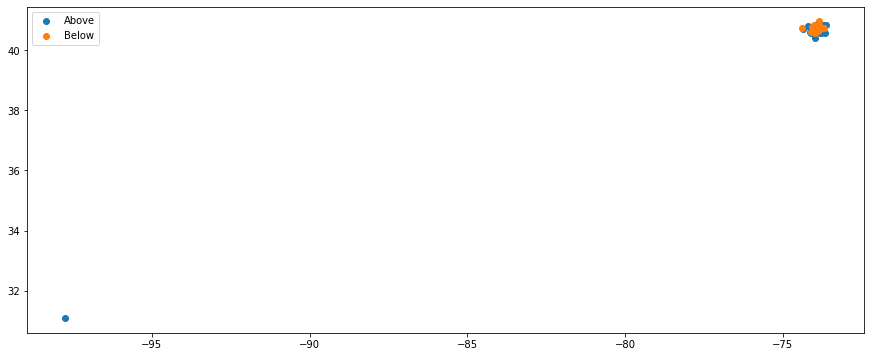

In [25]:
abv_avg_lon = []
abv_avg_lat = []
blw_avg_lon = []
blw_avg_lat = []

# Isolate longitude for above average restaurants
abv_avg_lon = isolate_values(above_average,'longitude')

# Isolate latitude for above average restaurants
abv_avg_lat = isolate_values(above_average,'latitude')

# Isolate longitude for below average restaurants
blw_avg_lon = isolate_values(below_average,'longitude')


# Isolate latitude for below average restaurants
blw_avg_lat = isolate_values(below_average,'latitude')

plt.figure(figsize=(15,6))
plt.scatter(abv_avg_lon, abv_avg_lat, label='Above')
plt.scatter(blw_avg_lon, blw_avg_lat, label='Below')
plt.legend();

## Remove the outlier

There is one restaurant in the above average dataset with a location dramatically west and south of all other observations. Let's remove that restaurant from the above average dataset and regenerate the scatter plot.

In [26]:
# Create an empty list
# that will contain data with
# the outlier removed
no_outliers = []

# Create an empty list to append the outlier
outlier = []

# Loop over every restaurant in the above average dataset
for restaurant in above_average:
    
    # Isolate the restaurant's longitude
    longitude = restaurant['longitude']
    
    # Check if the longitude value is greater than the integer -90
    if longitude > -90:
        
        # Append the restaurant to the no_outliers list
        no_outliers.append(restaurant)
        continue
        
    # If longitude is less than -90 it is an outlier
    # and should be appended to the outlier list
    outlier.append(restaurant)

Run the next cell unchanged to test your work!
> If the below cell runs without throwing an error, your code is likely correct!

In [27]:
assert type(no_outliers) == list
assert type(outlier) == list
assert len(no_outliers) == len(above_average) - 1
assert len(outlier) == 1

Now regenerate the longitude and latitude for above average restaurants using the `no_outliers` dataset, and regenerate the scatter plot!

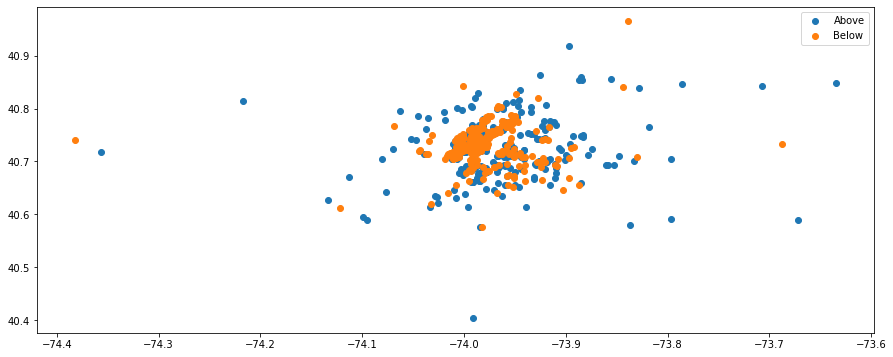

In [28]:
abv_avg_lon = isolate_values(no_outliers,'longitude')
abv_avg_lat = isolate_values(no_outliers,'latitude')

plt.figure(figsize=(15,6))
plt.scatter(abv_avg_lon, abv_avg_lat, label='Above')
plt.scatter(blw_avg_lon, blw_avg_lat, label='Below')
plt.legend();

Nice. This is much more interesting. 

## Plot the distribution of latitude and longitude

To get a better sense about how latitude and longitude are working, in the cell below plot histograms for latitude and longitude.

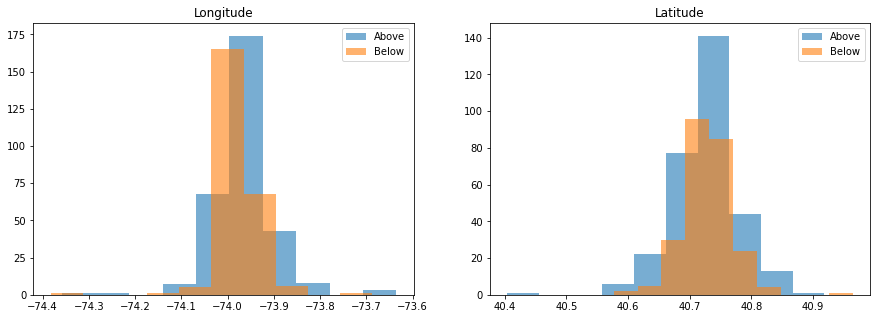

In [29]:
# Create a matplotlib subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(figsize=(15,5),ncols=2)

# Plot a histogram of above average longitude
# on the first subplot axis. Set alpha to .6
# Set label to the string "Above"
ax1.hist(abv_avg_lon, alpha=.6, label='Above')

# Plot a histogram of below average longitude
# on the first subplot axis. Set alpha to .6
# Set label to the string "Below"
ax1.hist(blw_avg_lon, alpha=.6, label='Below')

# Set the title for the first subplot axis
# to the string "Longitude"
ax1.set_title('Longitude')
ax1.legend()

# Plot a histogram of above average latitude
# on the second subplot axis. Set alpha to .6
# Set label to the string "Above"
ax2.hist(abv_avg_lat, alpha=.6, label='Above')

# Plot a histogram of below average latitude
# on the second subplot axis. Set alpha to .6
# Set label to the string "Below"
ax2.hist(blw_avg_lat, alpha=.6, label='Below')

# Set the title for the second subplot axis
# to the string "Latitude"
ax2.set_title('Latitude')
ax2.legend();

**Interpret the above visualization. How does it relate to your client's claims?**

The longitude data above shows that although there is some overlap, the majority of above average restaurants are further east than below average restaurants. On the other hand, the latitude data is far more similar with little difference between North and South.

## Find the most common zipcode for above average restaurants

In the cell below, loop over the restaurants in the above average dataset and count the frequency of the restaurants zipcode.

In [34]:
# Create an empty dictionary
# This dictionary will hold the counts
# for each zipcode
abv_avg_zip_cnts = {}

# Loop over the above average dataset
for restaurant in above_average:
    
    # Isolate the restaurant's zipcode 
    zip = restaurant['location']['zip_code']
    
    # Check if the zipcode is a key in the dictionary
    if zip in abv_avg_zip_cnts:
        
        # Add one to the zipcode's value
        abv_avg_zip_cnts[zip] +=1
        continue
    
    # If the zipcode is not a key
    # add it to the dictionary with a value of 1
    abv_avg_zip_cnts[zip] = 1


104


Run the next cell unchanged to test your work!
> If the below cell runs without throwing an error, your code is likely correct!

In [35]:
assert type(abv_avg_zip_cnts) == dict
assert len(abv_avg_zip_cnts) == 104 or len(abv_avg_zip_cnts) == 103
assert '10012' in abv_avg_zip_cnts

Now loop over the `abv_avg_zip_cnts` dictionary and find the zipcode with the largest count. 

For this question, there are multiple ways to find the solution. Comments have not been provided.

In [36]:
# Your code here
#solve without looping
print(max(abv_avg_zip_cnts, key=abv_avg_zip_cnts.get))

#solve with loop
#declare max variables
max_key = None
max_val = None

#loop through abv_avg_zip_cnts
for key, val in abv_avg_zip_cnts.items():
    
    #if it is first runthrough (max_val is still = none) or current val is larger than max val, update variables.
    if max_val is None or val > max_val:
        max_val = val
        max_key = key

print(f'Zip code {max_key} has {max_val} above average rated restaurants.' )

print(f'Zip code 10012 has {abv_avg_zip_cnts["10012"]} above average rated restaurants.')
    

10014
Zip code 10014 has 13 above average rated restaurants.
Zip code 10012 has 10 above average rated restaurants.


**Interpret the results. How does the most frequent zipcode relate to your client's claims?**

The Zip Code with the largest number of above average restaurants is `10014`. This disagrees with the clients data.

## Compile your findings into a report

You have address all of your client's claims! In the cell below, describe the findings of your analysis.

## Client Goal : 
To establish a new restaurant in New York City that will will achieve an above average Yelp rating. The client came to us with a number of theories about restaurants in New York City, based on their experience running restaurants in other cities, as well as from advice from other sources. They asked us to review these theories so they could make informed decision.

## Modeling and Data : 
To assist in the decision making required to achieve this goal, I have used Python to analyse the Yelp data for `1000` New York City restaurants. 

## Results :
I confirmed the range of ratings within the data. It ranged from `1` to `5` which was as expected.

I examined the clients first query regarding the average Yelp rating for restaurants in New York City. In their experience, cities have had an average Yelp rating of 3, and they wanted to know if this was true for New York City. Using the Histogram above I showed that the majority of restaurants ratings fell above `3`, and confirmed that the average rating was approximatly 4. This is higher than in other cities the client has worked in.

Based on this I detemined that above average reviews would be `4.5` or higher, and that below average reviews would be `3.5` or lower.

The clients noted that successful restaurants had a high number of reviews and believe that increasing the number of reviews they receive will ensure an increased Yelp rating. To examine this I created a pair of histograms that compared the number of reviews received by Above and Below average restaurants. The results appeared very similar, with the majority of both groups receiving between 0 and 500 reviews. The majority of data for both histograms fell within a single column. Ensuring the vertical scale of both figures matched, did not provide sufficient clarity. At first glance it appears as if the numbers for Above Average restaurants were higher than those of Below Average restaurants which would support the clients theory. Recognising that each histogram column represents a count of all values within its horizontal range I decided I needed a more relevant measure.

I calculated the mean review count for both groups. The mean review count for Above Average restaurants was `189.39`. Which was  lower than for Below Average restaurants with `286.0`. This data suggest the opposite of what the client expected.
As such they should not focus on increasing their review count as a method for achieving an Above Average Yelp rating.

The client believes the majority of Above Average restaurants have a `$$` price point and are considering increasing their own price point to match. To explore this, I created a pair of bar charts that show the counts of each price point for Above and Below Average restaurants. Both groups had nearly identical counts at the `$$` price point. The Below Average group had more `$`price points and the Above Average group had less. Of note, the highest price point for Above Average restaurants was 'Unknown'.

This decrease in `$` restaurants in the Above Average group may support an increase in price point. However I would recommend further research to clarify the unknown price points in the group. As the majority are unknown it is difficult to interpret the data in a useful way.

When considering locations for their restaurant, the client had been informed that restaurants were more likely to be Above Average the further East they were situated in New York City . They were also told that the biggest difference was between the North and South sides of the city. To examine this I created a scatter plot of both Above and Below Average restaurants Longitude (East West) and Latitude (North South) values. This would provide a similar layout to their position on an actual map. Initially this was impacted by a single Above Average restaurant that fell well to the South West of the other data causing the plot to be difficult to read. This outlier was removed, which resulted in a much more useful diagram that supported the clients information regarding the link between Above Average restaurants being more likely in the East of the city.

To provide additional clarity I overlayed the Above and Below Average Longitudes on one histogram and the Latitudes on another. This provided further support for the East side's Above Average restaurant count, however there was little evidence of a similar distinction between the North and South sides.

Finally the client believed that the Zip Code with the most Above Average restaurants was `10012`. I identified that there were `10` Above Average restaurants in Zip Code `10012`, however there were `13` in Zip Code `10014`.

## Summary :
In summary, restaurants in New York have a higher average Yelp rating than that expected by the client. Pushing to increase reveiew numbers is not supported by the data. A low number of positive reviews will be better than more negative reviews. Due to the high number of 'unknown' price points for above average restaurants, price point does not seem like a good predictor of Yelp rating, however further research to clarify price points might be useful. When considering locations, the data supported the theory that above average restaurants tended to be situated on the east side of the city, however did not support any difference between the north and south sides. Finally the suburb with the greatest number of above average restaurants was `10014`. 

# Summary

Well done! As you can see, manipulating nested data stuctures can be a challenging task. Pulling information from json objects requires a thoughtful inspection of how the data is organized, and code that allows you to avoid repetition.